In [93]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np 

In [95]:
# MNIST veri setinin keras kütüphanesi üzerinden yüklenmesi 


In [97]:
(x_train , y_train) ,(x_test,y_test) = keras.datasets.mnist.load_data()

In [98]:
x_train=x_train.reshape(-1,28,28,1) 
x_test=x_test.reshape(-1,28,28,1) 

In [101]:
x_train=x_train.astype('float32') /255.0
x_test=x_test.astype('float32') /255.0
print(f"Eğitim(Train) verilerinin sayısı ve boyutu = {x_train.shape}")
print(f"Eğitim(Test) verilerinin sayısı ve boyutu = {x_test.shape}")

Eğitim(Train) verilerinin sayısı ve boyutu = (60000, 28, 28, 1)
Eğitim(Test) verilerinin sayısı ve boyutu = (10000, 28, 28, 1)


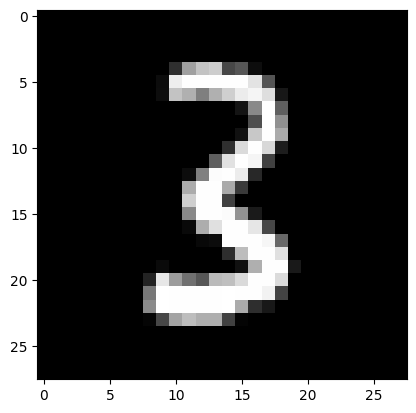

In [103]:
plt.imshow(x_train[50000],cmap="gray")

In [105]:
y_train[50000]

3

In [107]:
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)

In [109]:
y_train[50000]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [111]:
X_train, X_val,y_trainsplit,y_val=train_test_split(
    x_train,y_train,test_size=0.2,
    random_state=42,
    stratify=y_train
    )

In [113]:
# cnn tabanlı yapay zeka modelini oluşturuyoruz

In [136]:
model=keras.Sequential([
    #cnn ilk blok
    keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32,(3,3),activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),

       #cnn ikinci blok
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),
        #yapay zeka oluşturuldu
    keras.layers.Flatten(),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation='softmax') # softmax çoklu sınıflandırma problemlerinde en çok kullanılandır
    
])

In [138]:
#modeli derliyoruz

In [140]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [142]:
model_checkpoint=keras.callbacks.ModelCheckpoint(
    'mnist_classification_cnn_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

In [144]:
#modelimizi eğitiyoruz (.fit fonksiyonu ile)

In [148]:
history=model.fit(X_train,y_trainsplit,validation_data=(X_val,y_val),
                 batch_size=128,epochs=10,callbacks=model_checkpoint)

Epoch 1/10
375/375 [==============================] - ETA: 0s - loss: 0.2040 - accuracy: 0.9383
Epoch 1: val_accuracy improved from -inf to 0.11633, saving model to mnist_classification_cnn_model.h5
375/375 [==============================] - 33s 86ms/step - loss: 0.2040 - accuracy: 0.9383 - val_loss: 8.3788 - val_accuracy: 0.1163
Epoch 2/10
375/375 [==============================] - ETA: 0s - loss: 0.0668 - accuracy: 0.9787
Epoch 2: val_accuracy improved from 0.11633 to 0.98783, saving model to mnist_classification_cnn_model.h5
375/375 [==============================] - 32s 86ms/step - loss: 0.0668 - accuracy: 0.9787 - val_loss: 0.0394 - val_accuracy: 0.9878
Epoch 3/10
375/375 [==============================] - ETA: 0s - loss: 0.0468 - accuracy: 0.9847
Epoch 3: val_accuracy improved from 0.98783 to 0.98825, saving model to mnist_classification_cnn_model.h5
375/375 [==============================] - 32s 86ms/step - loss: 0.0468 - accuracy: 0.9847 - val_loss: 0.0386 - val_accuracy: 0.988

In [165]:
print("Test işlemi için değerlendirme yapılıyor")
test_loss,test_accuracy=model.evaluate(x_test,y_test)
print(f"modelin loss performansı={test_loss}")
print(f"Modelin accuracy (Doğruluk başarısı) performansı = {test_accuracy}")

Test işlemi için değerlendirme yapılıyor
313/313 [==============================] - 2s 8ms/step - loss: 0.0218 - accuracy: 0.9935
modelin loss performansı=0.02175002545118332
Modelin accuracy (Doğruluk başarısı) performansı = 0.9934999942779541
